# Data Visualisation
This notebook explores the raw data. 

Import libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Load and view EEG data and labels of first subject

In [127]:
x =  pd.read_csv(r'C:/Users/tomry/Documents/EEG/train/subj1_series1_data.csv')
x.drop('id', inplace=True, axis=1)
x = x.to_numpy()
x = x[:,0]
y = pd.read_csv(r'C:/Users/tomry/Documents/EEG/train/subj1_series1_events.csv')
y.drop('id', inplace=True, axis=1)
y = y.to_numpy()

Function to plot the raw eeg data with events overlayed. 

In [128]:
COLOURS = {0:'b', 
           1:'g', 
           2:'r', 
           3:'c', 
           4:'m', 
           5:'y'}

handstart = mpatches.Patch(color=COLOURS[0], label='HandStart', alpha=0.5)
firstdigittouch = mpatches.Patch(color=COLOURS[1], label='FirstDigitTouch', alpha=0.5)
bothstartloadphase = mpatches.Patch(color=COLOURS[2], label='BothStartLoadPhase', alpha=0.5)
liftoff = mpatches.Patch(color=COLOURS[3], label='LiftOff', alpha=0.5)
replace = mpatches.Patch(color=COLOURS[4], label='Replace', alpha=0.5)
bothreleased = mpatches.Patch(color=COLOURS[5], label='BothReleased', alpha=0.5)

def plot_data_with_events(data, events, start, end, handles): 
    
    data = data[start:end]
    events = events[start:end, :]
    index = range(start, end)

    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(index, data)
    
    for j in range(events.shape[1]):
        start_ = None
        end_ = None
        for i in range(1, len(events)-1):
            if events[i,j] == 1 and events[i-1,j] == 0:
                start_ = i
            elif events[i,j] == 1 and events[i+1,j] == 0:
                end_ = i
            if start_ and end_ :
                ax.axvspan(start+start_, start+end_, alpha=0.5, color=COLOURS[j])
                start_ = None
                end_ = None
    
    plt.ylabel('Amplitude (µV)')
    plt.xlabel('Samples')
    plt.legend(handles=handles)
    plt.show()


All

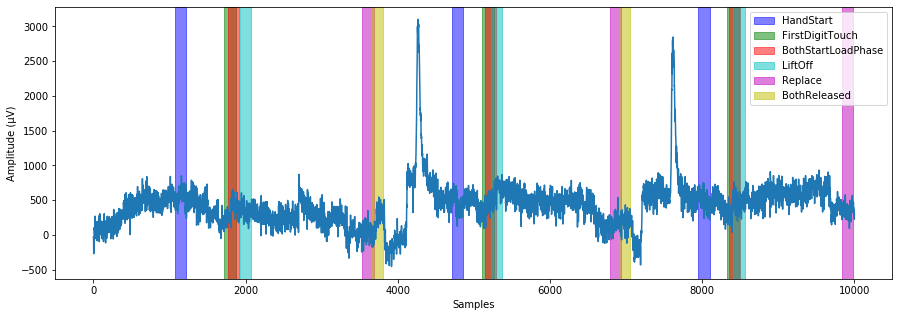

In [129]:
plot_data_with_events(x, y, 0, 10000, [handstart, firstdigittouch, bothstartloadphase, liftoff, replace, bothreleased])

HandStart

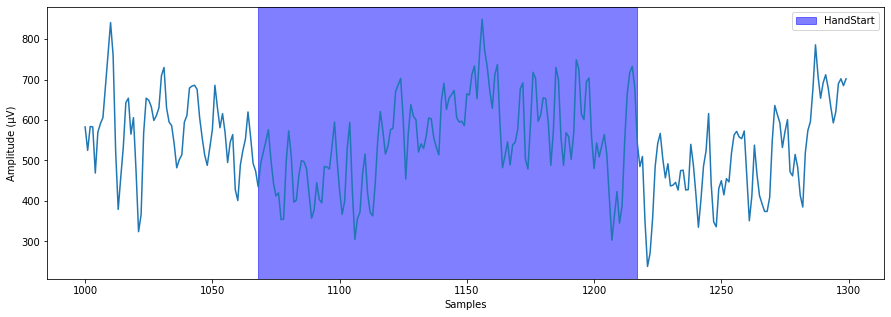

In [130]:
plot_data_with_events(x, y, 1000, 1300, [handstart])

FirstDigitTouch, BothStartLoadPhase, LiftOff

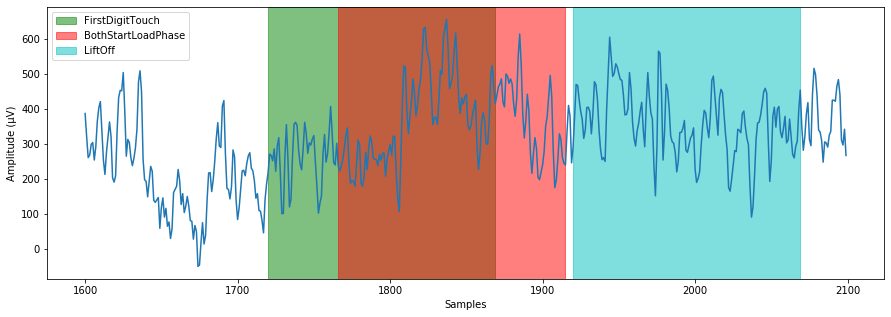

In [131]:
plot_data_with_events(x, y, 1600, 2100, [firstdigittouch, bothstartloadphase, liftoff])

Replace, BothReleased

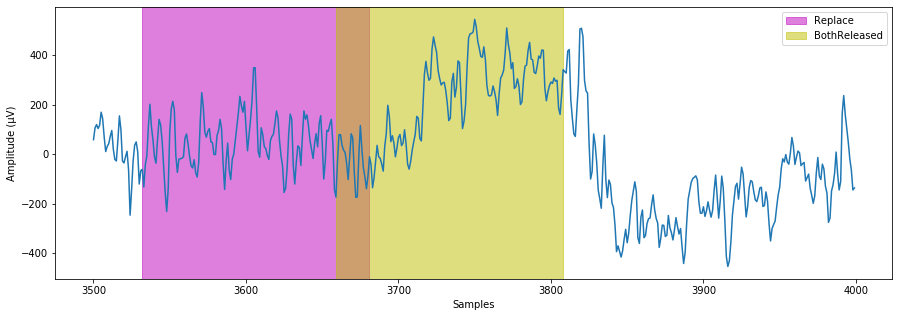

In [132]:
plot_data_with_events(x, y, 3500, 4000, [replace, bothreleased])